<a href="https://colab.research.google.com/github/vrohra99/mtp/blob/main/Health_FD003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
 
 
uploaded = files.upload()

Saving train_FD003.txt to train_FD003.txt


In [2]:
pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 129 kB 2.1 MB/s 


In [14]:
import pandas as pd
from hmmlearn.hmm import GMMHMM, GaussianHMM
from hmmlearn.base import BaseHMM
from sklearn.preprocessing import StandardScaler
import io

In [15]:
traindata = pd.read_csv(io.BytesIO(uploaded['train_FD003.txt']), sep= " ", header = None )
traindata.drop([26,27],inplace=True,axis=1)
traindata.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [16]:
engines=int(traindata.loc[traindata.shape[0]-1][0])
engines

100

In [17]:
hpc_kpi=[7,11,15]


In [18]:
hiddenstates=30

In [19]:
startprob=[0]*hiddenstates
startprob[0]=1
print(startprob)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
import numpy as np
transmat=np.identity(hiddenstates)
for i in range(0,hiddenstates-1):
    transmat[i][i]=0.5
    transmat[i][i+1]=0.5

In [21]:
health_state=[]

In [22]:
def iterate(i):
  try:
    hpc=traindata.loc[traindata[0]==i][hpc_kpi]
    hpc=StandardScaler().fit_transform(hpc)
    model = GMMHMM(n_components=30, covariance_type="diag", init_params="cm", params="cmt")
    model.transmat_=transmat
    model.startprob_=startprob
    model.fit(hpc)
    pred=model.decode(hpc,algorithm="viterbi")[1]
    health_state.append(pred)
    print(i)
  except:
    iterate(i)

In [23]:
for i in range(1,engines+1):
  iterate(i)
  print("*******************************************************************************************************************************************************************************")

/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

1
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

2
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

3
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


4
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

5
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

6
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encount

7
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


8
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

9
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

10
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

11
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


12
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

13
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

14
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

15
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


16
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

17
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


18
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

19
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

20
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

21
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

22
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

23
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


24
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

25
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

26
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

27
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


28
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

29
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

30
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


31
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

32
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

33
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

34
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

35
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


36
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


37
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


38
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


39
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

40
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


41
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

42
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encount

43
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


44
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

45
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

46
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


47
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


48
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

49
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

50
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


51
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


52
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

53
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

54
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true

55
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

56
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

57
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encount

58
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by z

59
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

60
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encount

61
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

62
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


63
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


64
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

65
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

66
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

67
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


68
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

69
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

70
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

71
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

72
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

73
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

74
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

75
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

76
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


77
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

78
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

79
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

80
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true

81
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


82
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

83
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

84
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

85
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


86
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

87
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


88
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

89
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

90
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true

91
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


92
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


93
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


94
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


95
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

96
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


97
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


98
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

99
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

100
*******************************************************************************************************************************************************************************


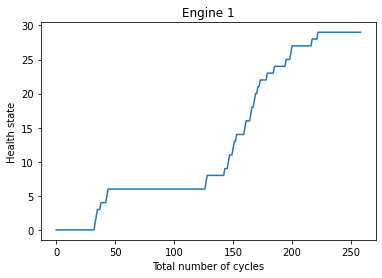

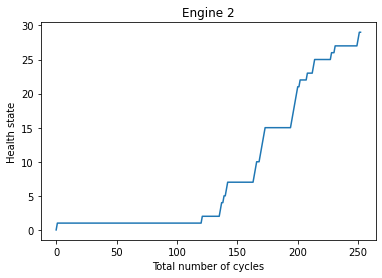

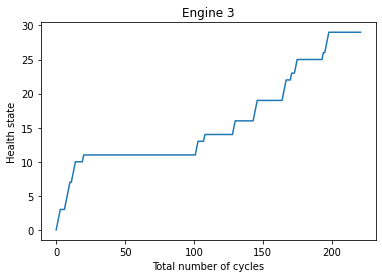

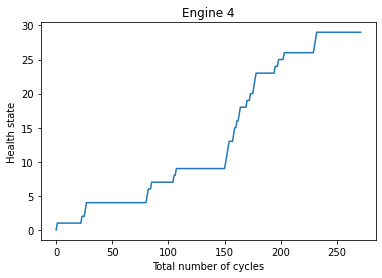

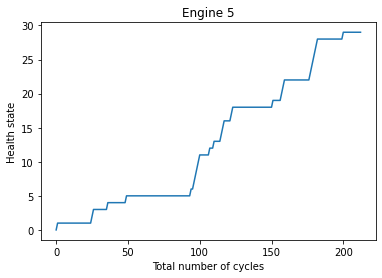

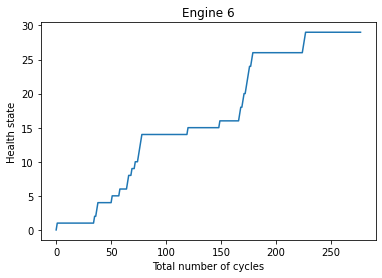

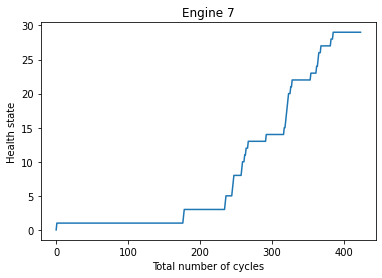

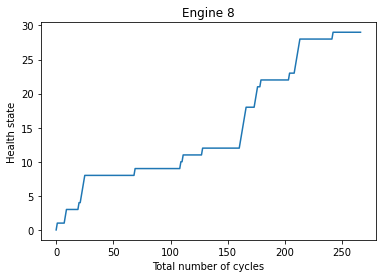

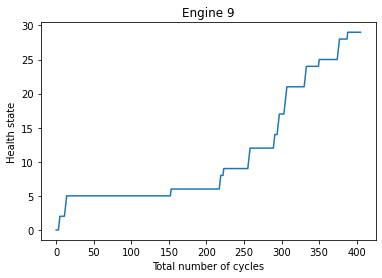

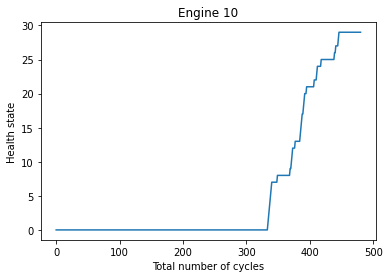

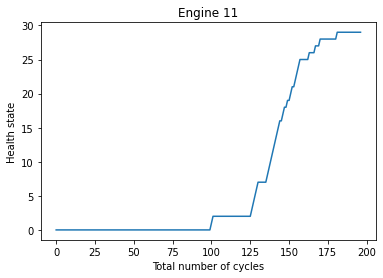

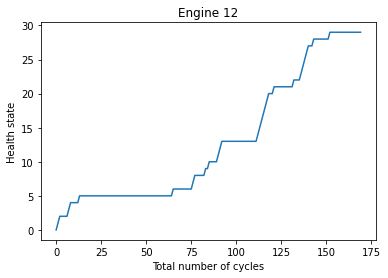

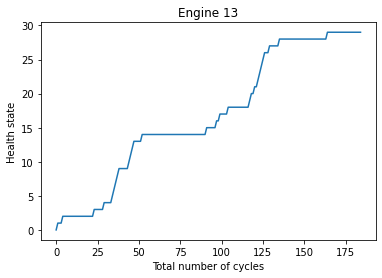

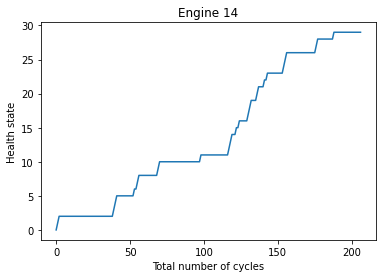

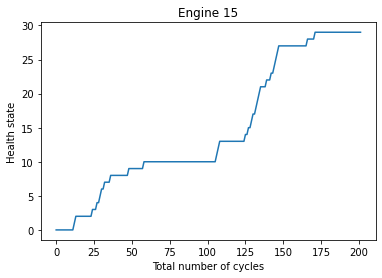

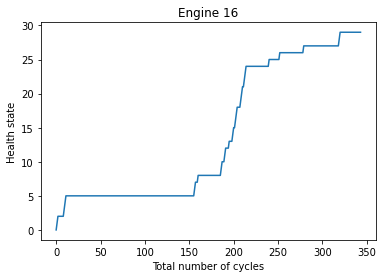

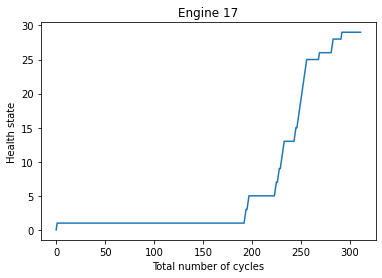

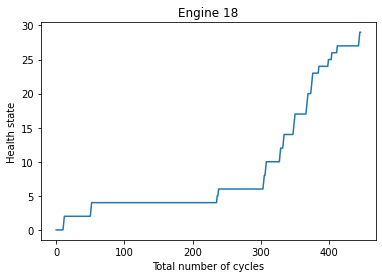

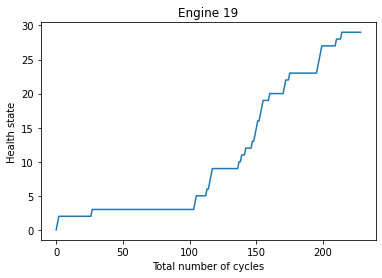

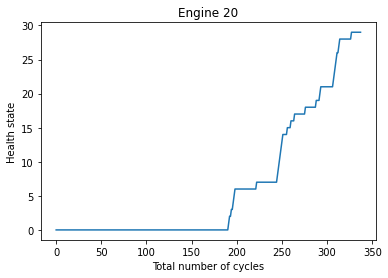

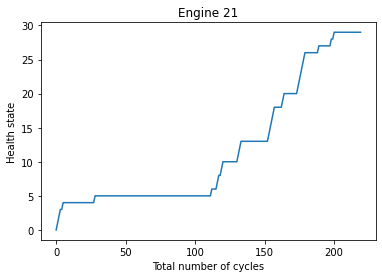

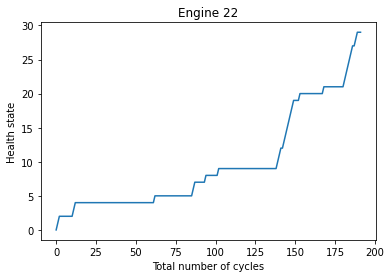

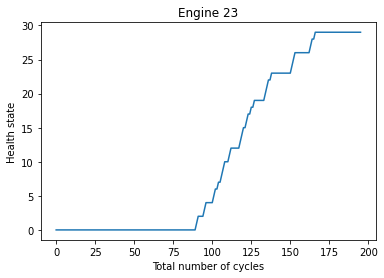

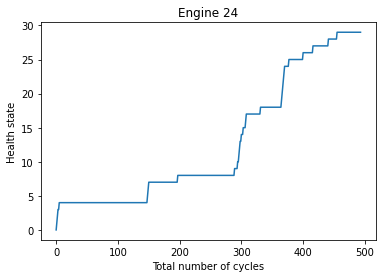

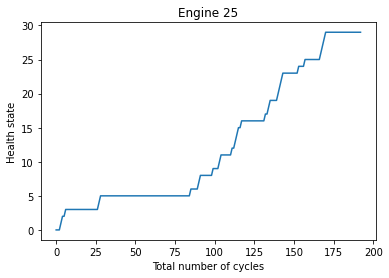

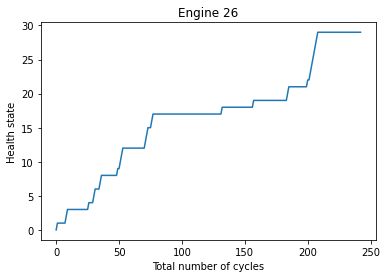

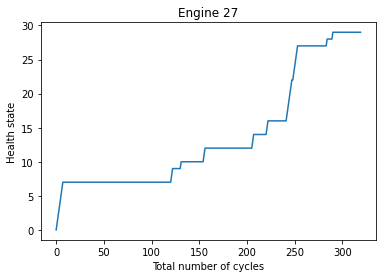

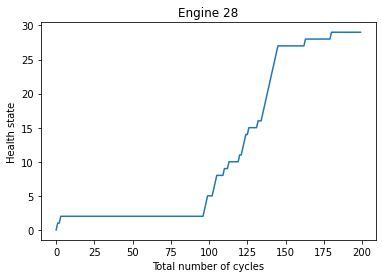

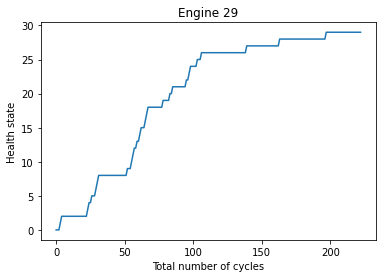

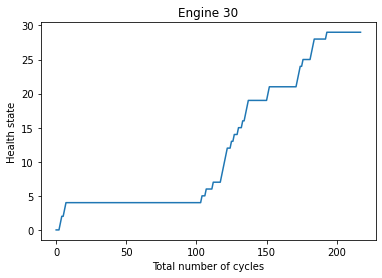

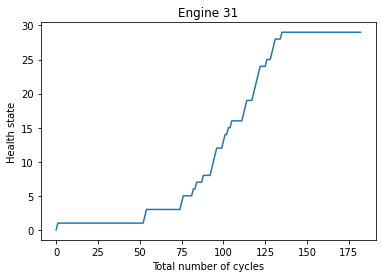

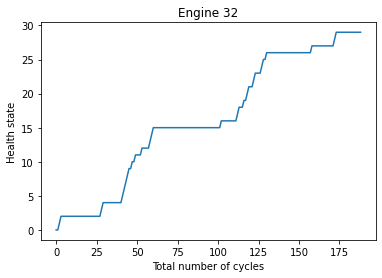

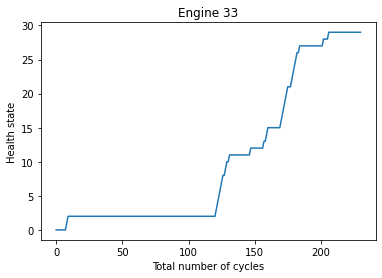

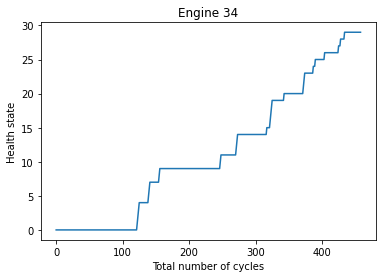

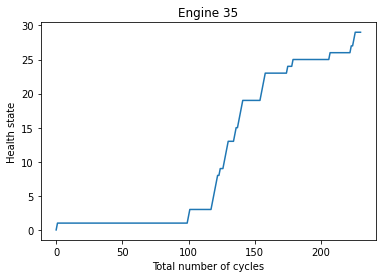

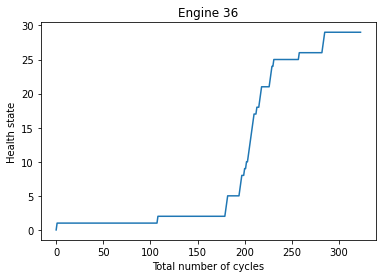

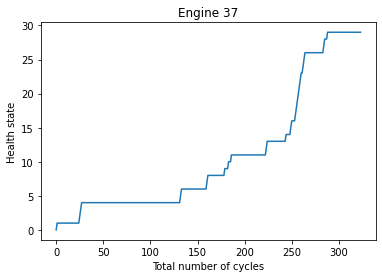

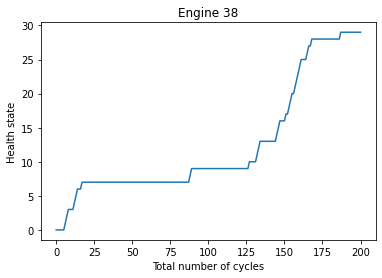

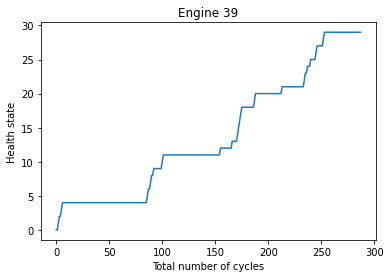

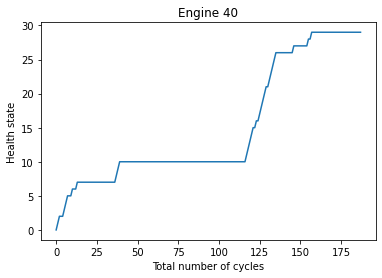

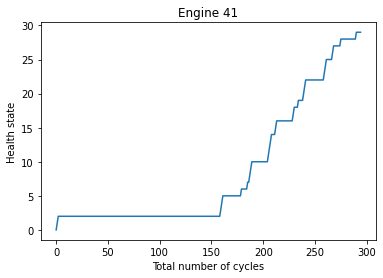

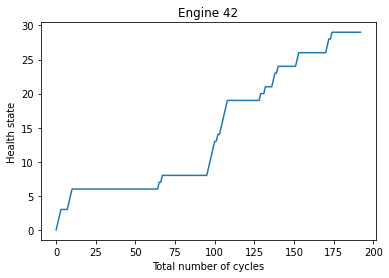

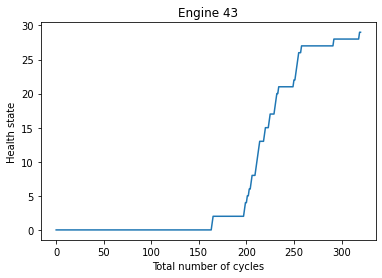

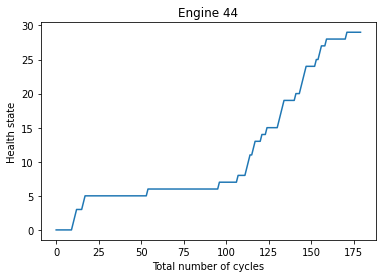

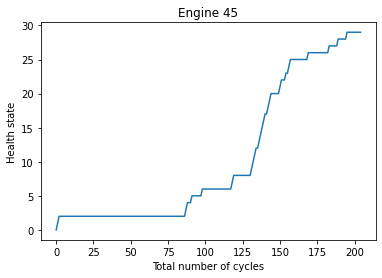

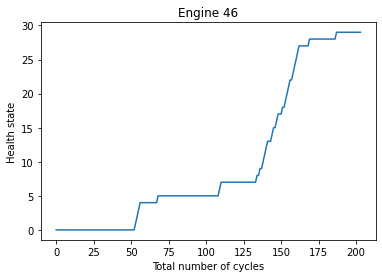

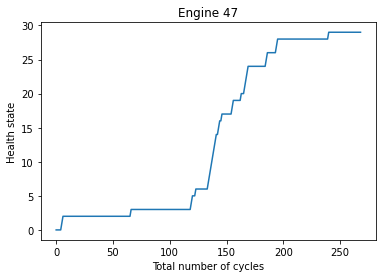

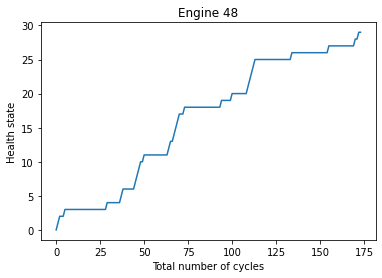

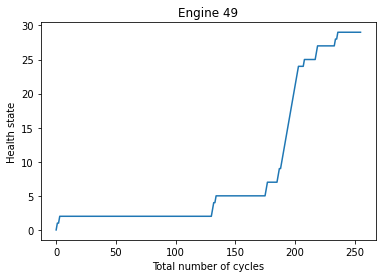

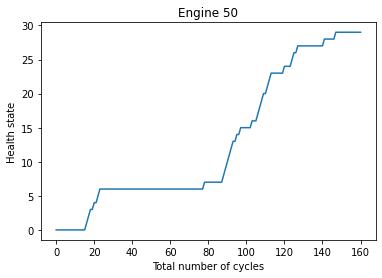

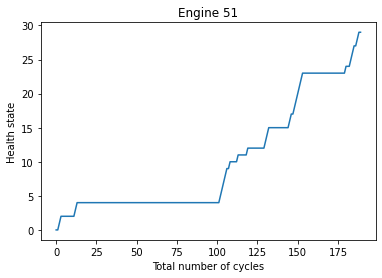

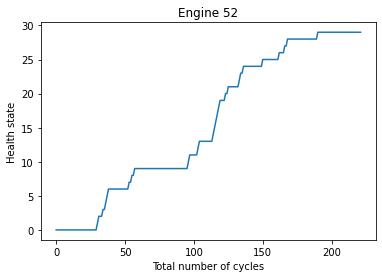

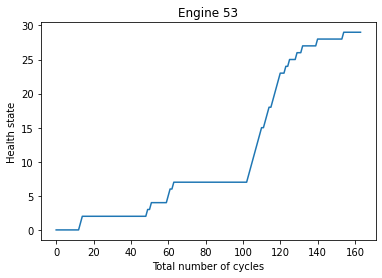

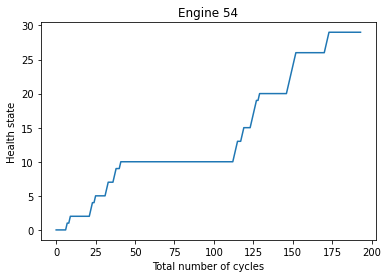

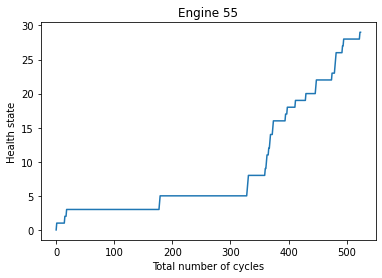

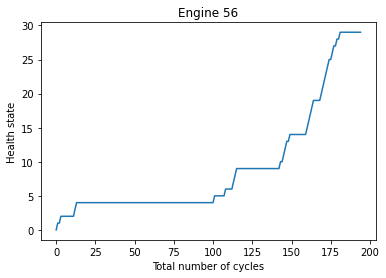

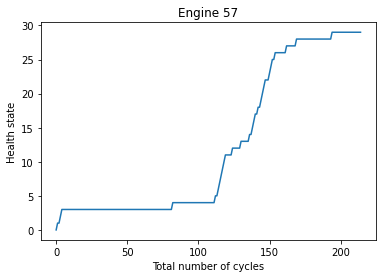

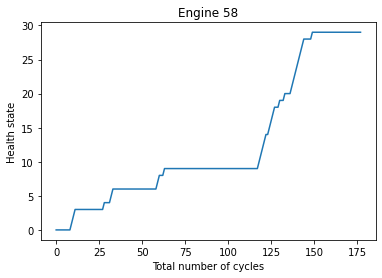

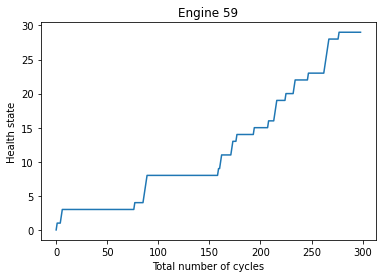

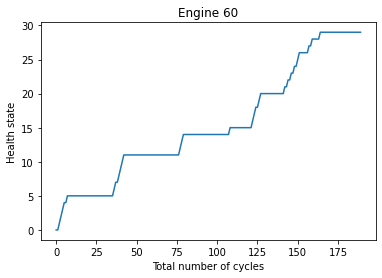

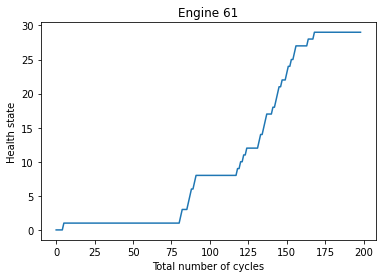

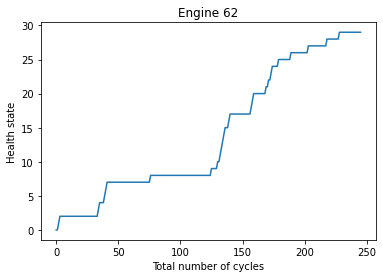

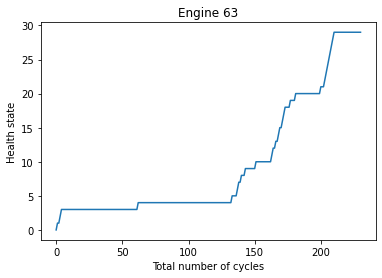

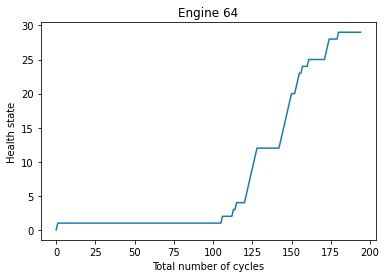

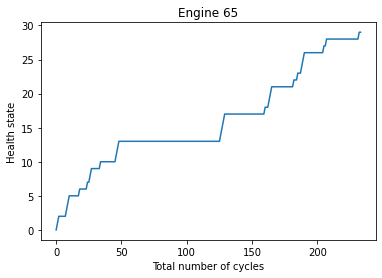

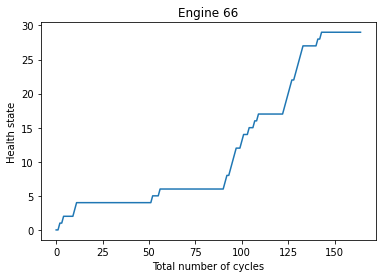

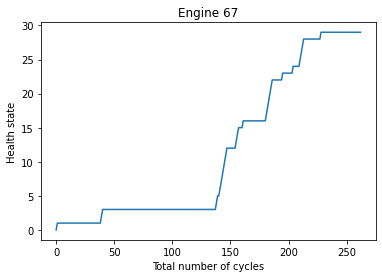

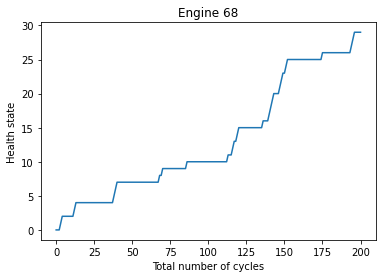

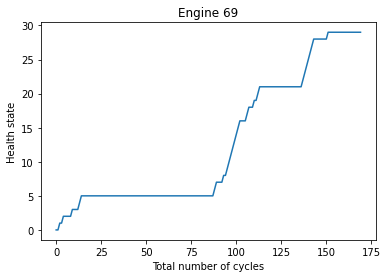

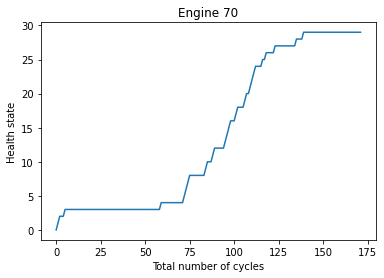

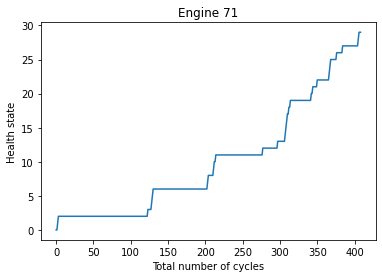

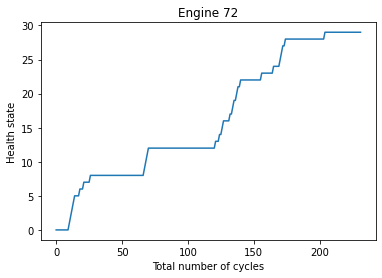

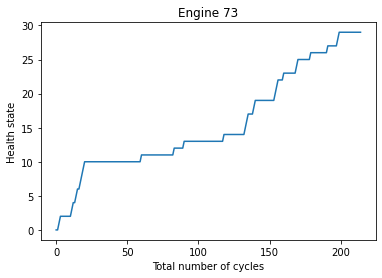

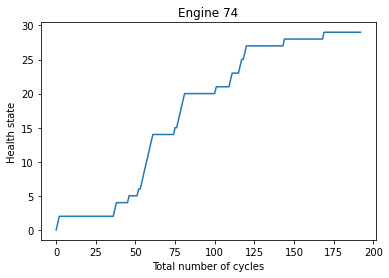

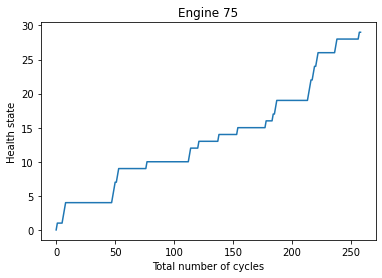

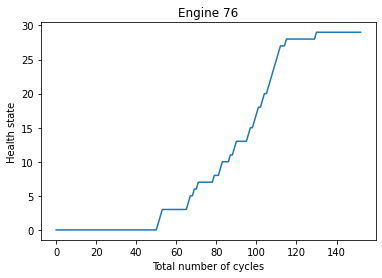

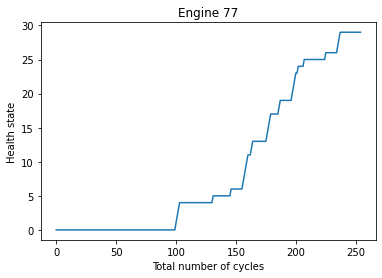

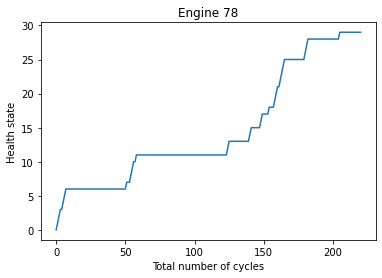

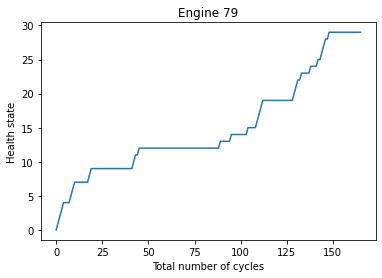

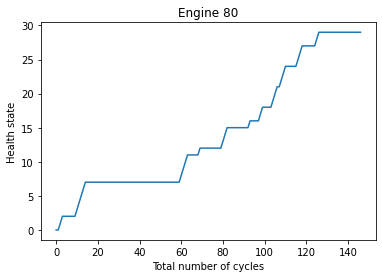

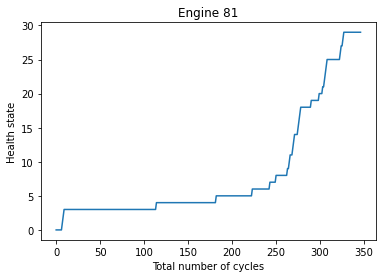

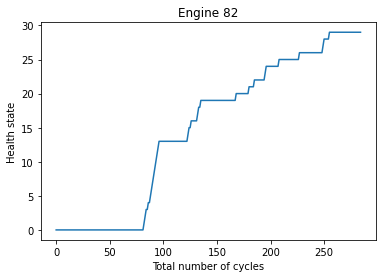

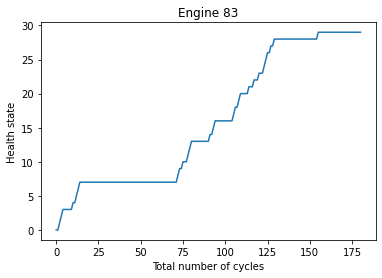

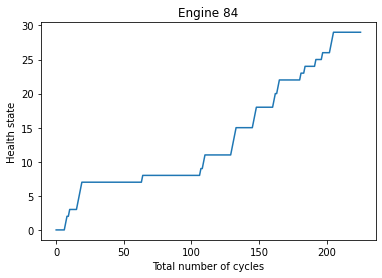

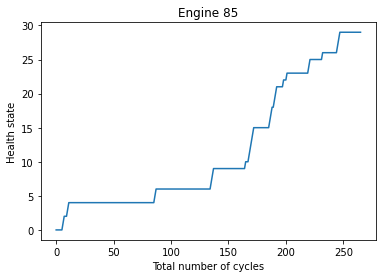

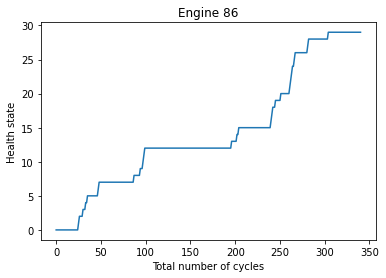

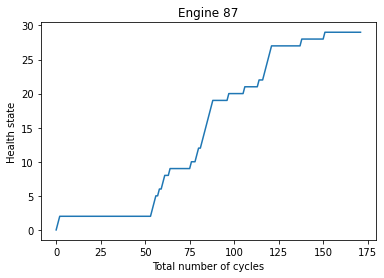

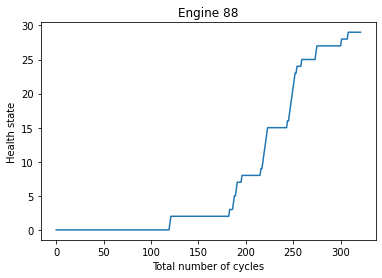

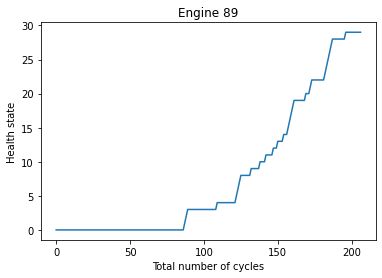

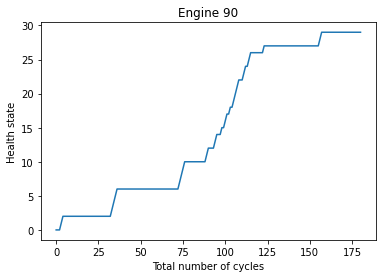

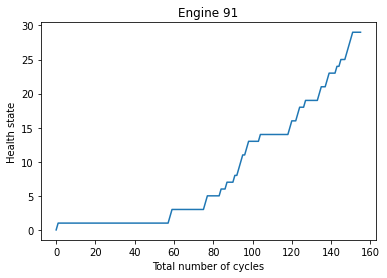

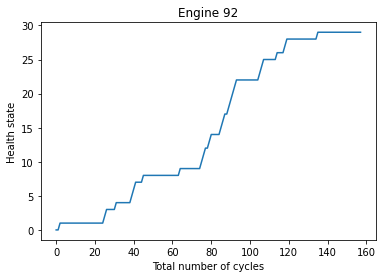

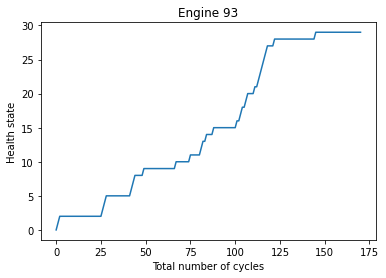

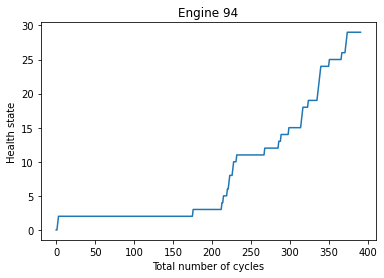

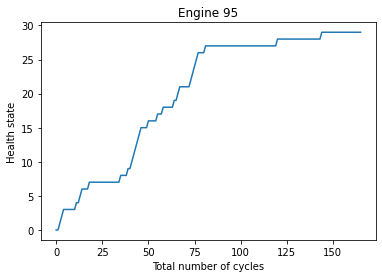

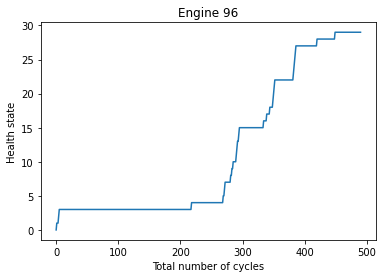

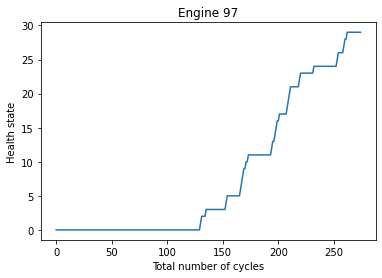

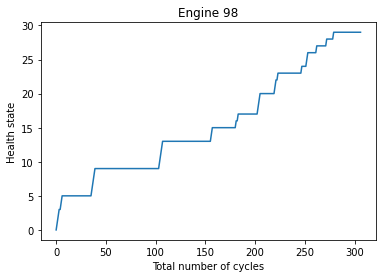

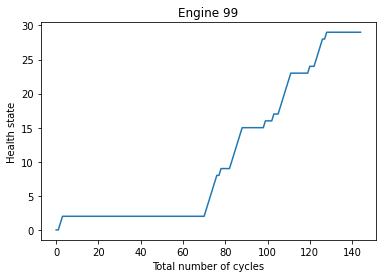

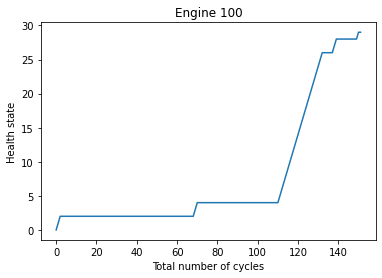

In [24]:
import matplotlib.pyplot as plt
for i in range(0,engines):
  plt.plot(health_state[i])
  plt.xlabel('Total number of cycles')
  plt.ylabel('Health state')
  plt.title(f'Engine %d'%(i+1))
  plt.show()